# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.manifold import TSNE

from sklearn.cluster import AgglomerativeClustering

Data Import

In [2]:
data= pd.read_csv('Wholesale_Data.csv')

Data Cleaning

In [3]:
data.info()
#Dataset is made of 440 rows and 8 columns, no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
# The region is 3 throughout the dataset. we can remove it and it won't affect anything since our dataset still is 'Region 3 Wholesale Data'
df_columns= ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']
df= data[df_columns]
df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


In [5]:
#We can add another feature that gives us a total of items by each channel. This way, we find a way to relate channels and prices
df['Tot_by_Channel'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']
df 

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Tot_by_Channel
0,2,12669,9656,7561,214,2674,1338,34112
1,2,7057,9810,9568,1762,3293,1776,33266
2,2,6353,8808,7684,2405,3516,7844,36610
3,1,13265,1196,4221,6404,507,1788,27381
4,2,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,73302
436,1,39228,1431,764,4510,93,2346,48372
437,2,14531,15488,30243,437,14841,1867,77407
438,1,10290,1981,2232,1038,168,2125,17834


Data Description

In [6]:
df.describe() 
#throughout the data, mean is close to std, and both are closer to max in relation to min. this shows that there are outliers

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Tot_by_Channel
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


Data Visualization

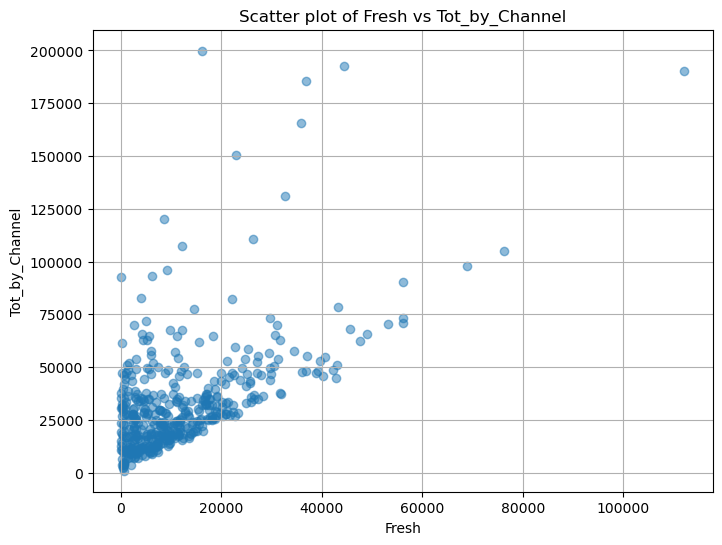

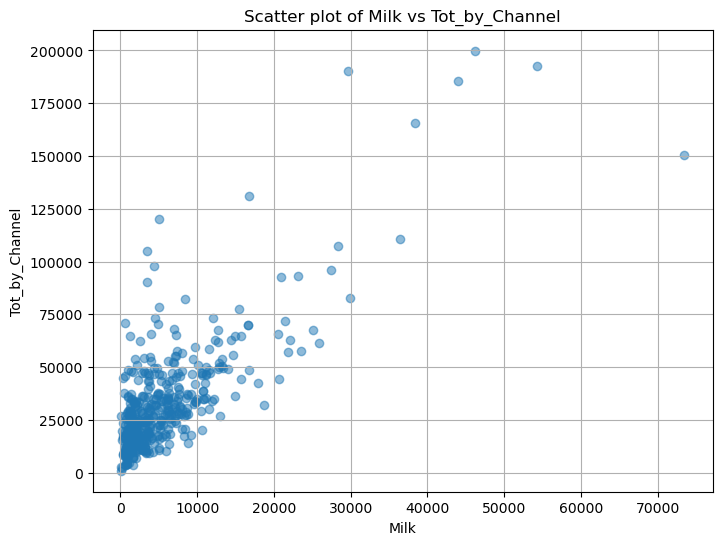

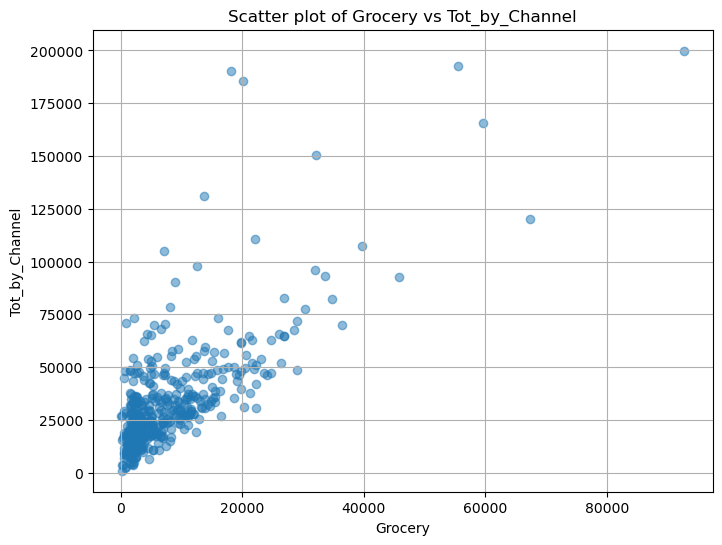

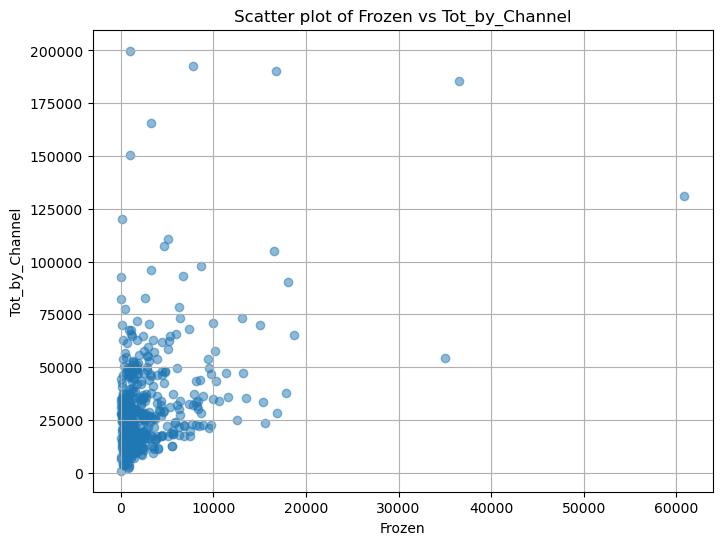

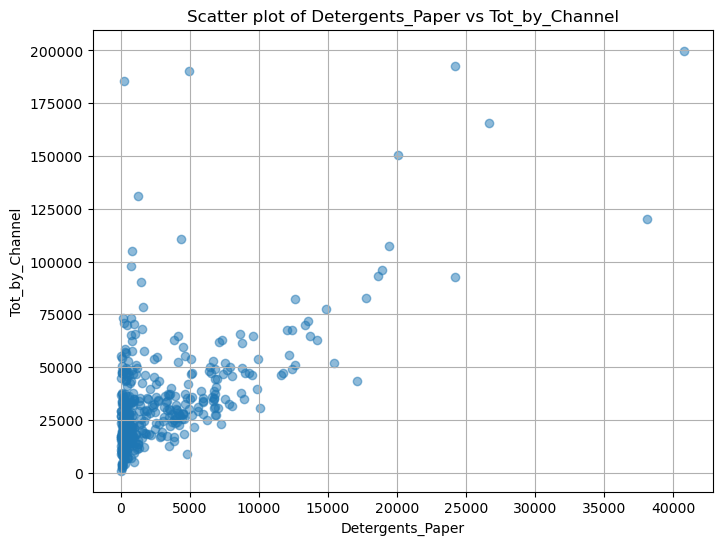

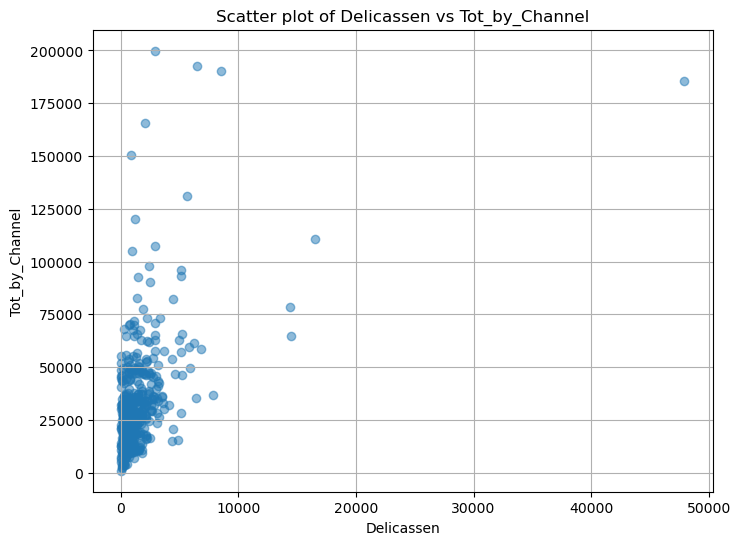

In [7]:
#Our target variable is Total by channeel (Tot_by_channel) and we are going to visualize the relationship between Tot_by_channel each variable, using scatterplot

# List of columns to create scatter plots for
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] 
#target column
target_column ='Tot_by_Channel' 

# looping to create the scatterplot
for col in columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col], df[target_column], alpha=0.5)
    plt.title(f"Scatter plot of {col} vs {target_column}")
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()

In [15]:
#These scatter plot shows us that there is a correlation between the 5 variables and Tot_by_Channel. However, it also helps us to visualize the outliers. 

Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.

In [8]:
#Since the graph shows that our dataset is normally distributied, we can easily identify outliers using z-score
#z-score measures how many std. above or below mean are in the dataset. by setting a threshold, we are declaring that anything above or below is an outlier
#z-score returns a negative value whose absolute value gives a positive
threshold = 3
z_score = stats.zscore(df)
outliers = df[abs(z_score) > threshold]
outliers.info()
#We filtered through the dataset to get only the outliers, and we will use it to decide if it is a significant number in our dataset
#The outliers are present in all features and considering the our dataset (440) and the outliers (51), it is a significant number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           0 non-null      float64
 1   Fresh             7 non-null      float64
 2   Milk              9 non-null      float64
 3   Grocery           7 non-null      float64
 4   Frozen            6 non-null      float64
 5   Detergents_Paper  10 non-null     float64
 6   Delicassen        4 non-null      float64
 7   Tot_by_Channel    8 non-null      float64
dtypes: float64(8)
memory usage: 27.6 KB


Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.

In [64]:
#We can use pandas' corr. to calculate the correlation coefficients 

In [9]:
#Correlation between Fresh, Milk, Grocery, Frozen, Detergents_Paper, 
#and Delicassen
cols_df = ['Milk', 'Fresh', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
corr_df = df[cols_df]
correlation_matrix = corr_df.corr()
#Let's calculate the possible correlation coefficients throughout our dataset. However, to better understand what is going on, 
# we will visualize the results using a pairplot
print(correlation_matrix)

                      Milk     Fresh   Grocery    Frozen  Detergents_Paper  \
Milk              1.000000  0.100510  0.728335  0.123994          0.661816   
Fresh             0.100510  1.000000 -0.011854  0.345881         -0.101953   
Grocery           0.728335 -0.011854  1.000000 -0.040193          0.924641   
Frozen            0.123994  0.345881 -0.040193  1.000000         -0.131525   
Detergents_Paper  0.661816 -0.101953  0.924641 -0.131525          1.000000   
Delicassen        0.406368  0.244690  0.205497  0.390947          0.069291   

                  Delicassen  
Milk                0.406368  
Fresh               0.244690  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000  


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

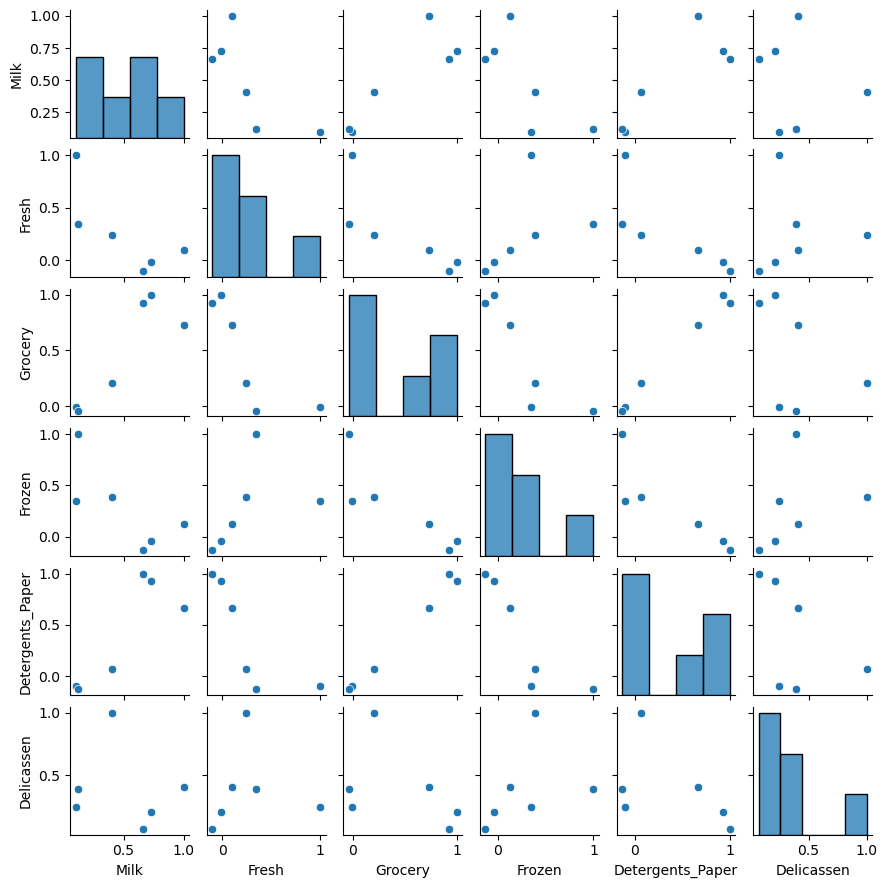

In [106]:
# let'us use our correlation matrix and visualize the correlation on a pair plot
sb.pairplot(correlation_matrix, height = 1.5)

This pairplot gives us insights into correlation among the variables: 
1. Milk: has positive correlaton with Grocery, Detergents_Paper, and Delicassen
2. Fresh: has a positive correlation with Frozen and Delicassen
3. Frozen: has a positive correlatin with Fresh and Delicassen
4. Detergents_Paper: has a positive correlatin with Milk and Grocery
5. Delicassen: has a positive correlation with Milk, Fresh, Grocery, and Frozen

Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.

Our data has a few outliers. We have a few options here. We can either remove them from the dataset or transform them on some way. Since outliers are significant we cannot remove them. 
We will transform them in same way. Let's go with clipping which will do the following: 

1. round up anything above 0.95 percentile
2. round down anything below 0.5 percentile

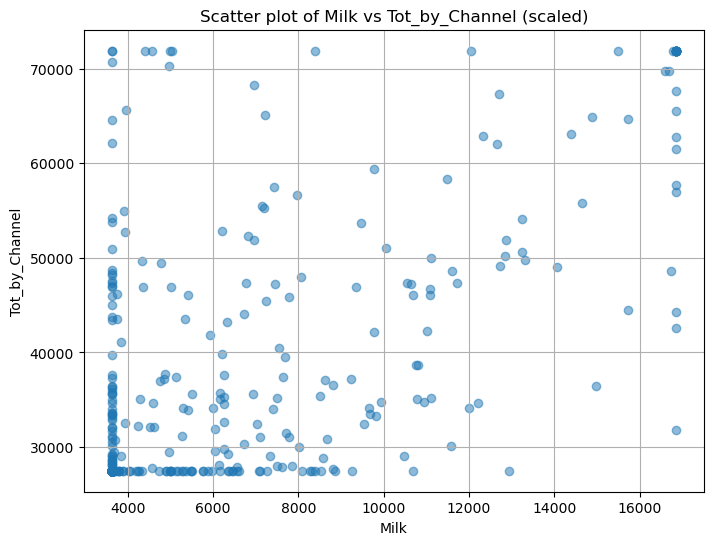

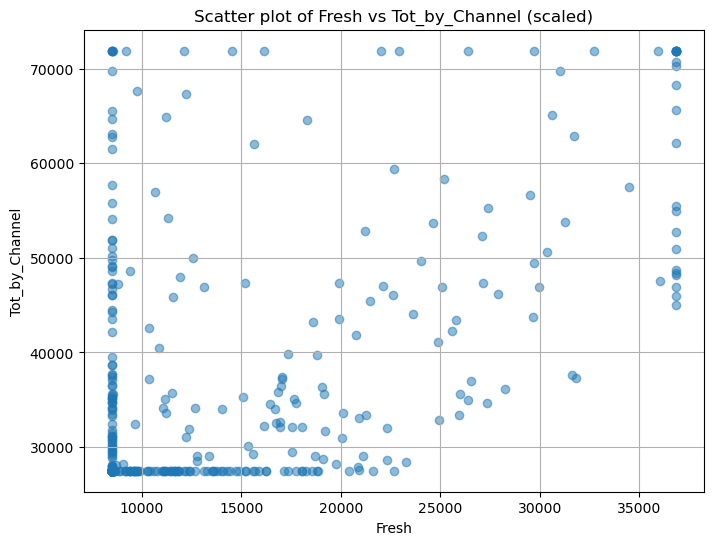

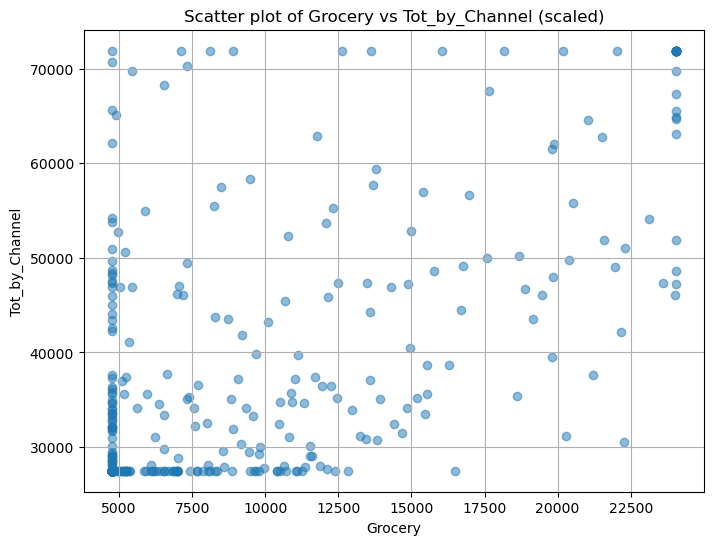

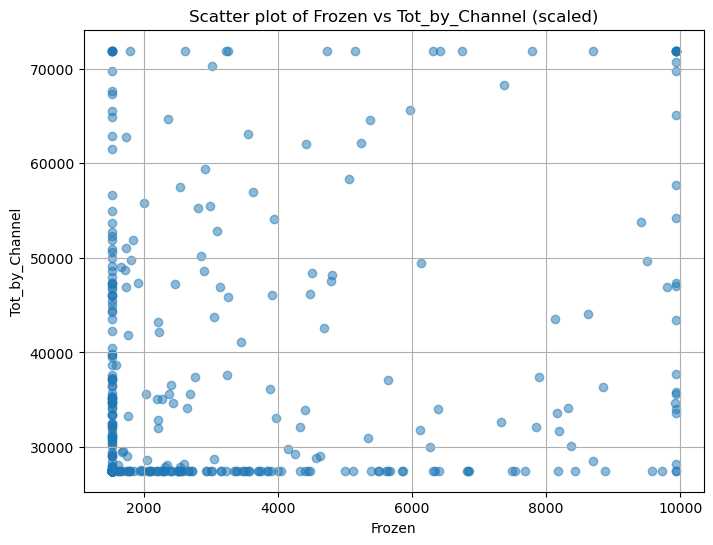

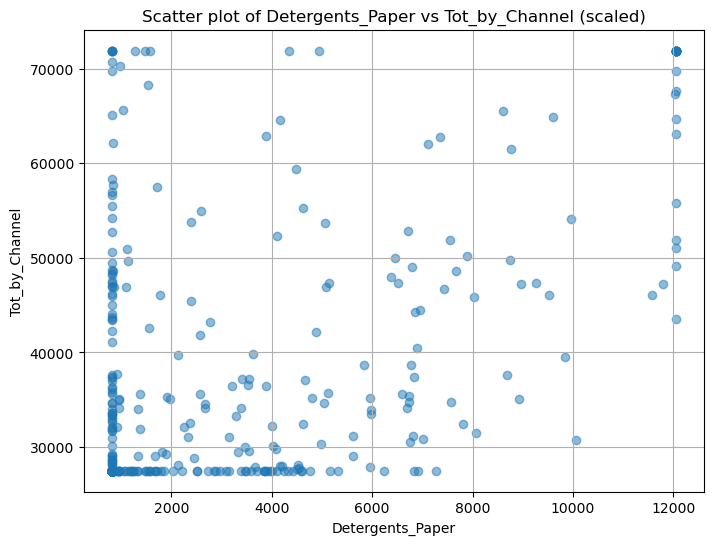

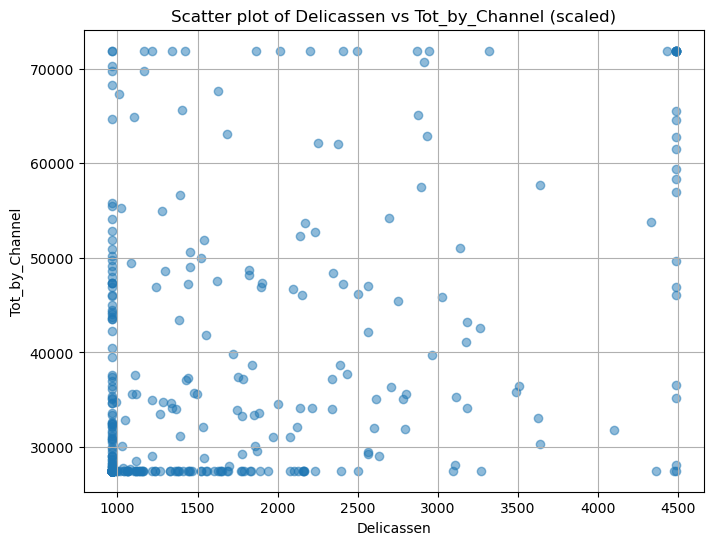

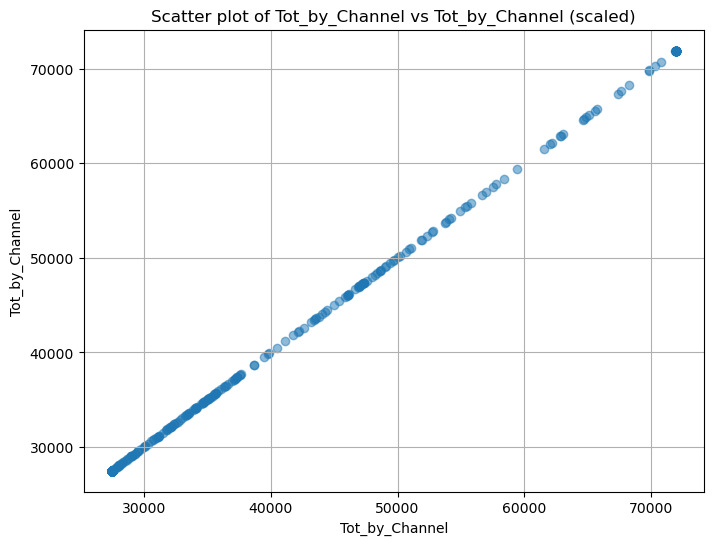

In [71]:
up = df.quantile(0.95)
bottom = df.quantile(0.5)

clipped_df = df.clip(upper=up, lower=bottom, axis = 1)
new_df_cols = ['Milk', 'Fresh','Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Tot_by_Channel']
target_column ='Tot_by_Channel' 
new_df = clipped_df[new_df_cols]
new_df

# Visualize the clipped data
for col in new_df_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(new_df[col], new_df[target_column], alpha=0.5)
    plt.title(f"Scatter plot of {col} vs {target_column} (scaled)")
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()

#These graphs are a bit better compared to the df dataset because now there are no outliers (we clipped them). Now the new dataset can be defined where there are no outliers (new_df)

Feature Selection

In [73]:
data_cols = ['','Milk','Fresh', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
target_col = ['Tot_by_Channel']

#we will standardize our data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_df)

#we will fit our transformed dataset on PCA and get evr, and cv of ratio
pca = PCA()
pca.fit(data_scaled)
explained_var_ratio = pca.explained_variance_ratio_
cumul_var_ratio = explained_var_ratio.cumsum()

#we will set percentage explained by features and use it to get features, then fit t PCA
perc_explained = 0.95
nber_features = np.argmax(cumul_var_ratio >= perc_explained) + 1

pca = PCA(n_components = nber_features)
pca.fit(data_scaled)

#we will get the principal features, and their names
feats = pca.components_
feat_names = new_df.columns

#We turn it into a dataframe
feats_sel_df = pd.DataFrame(feats.T, columns=[f'PC{i+1}' for i in range(nber_features)], index=feat_names)

# Show the DataFrame
feats_sel_df


,PC1,PC2,PC3,PC4,PC5
Milk,0.479426,-0.096033,0.120568,-0.076720,0.822688
Fresh,0.099589,0.595883,-0.606156,0.208995,-0.010466
Grocery,0.502160,-0.219670,-0.046185,-0.106612,-0.259487
Frozen,0.028392,0.537306,0.393173,-0.723109,-0.118063
Detergents_Paper,0.454731,-0.326352,-0.082857,-0.137575,-0.458875
Delicassen,0.276609,0.320926,0.624276,0.628672,-0.176675
Tot_by_Channel,0.473253,0.298748,-0.254431,-0.045013,-0.004616


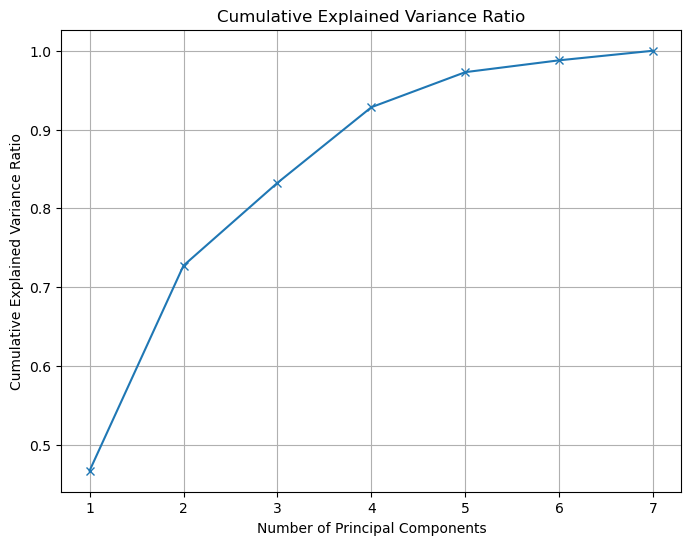

In [74]:
#visualization. I will use explained_var_ratio and cumul_var_ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumul_var_ratio) + 1), cumul_var_ratio, marker='x', )
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

The plot above clearly displays that all features contribute contribute the most to the overall variance in the dataset. This is done using principal component analysis (PCA)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

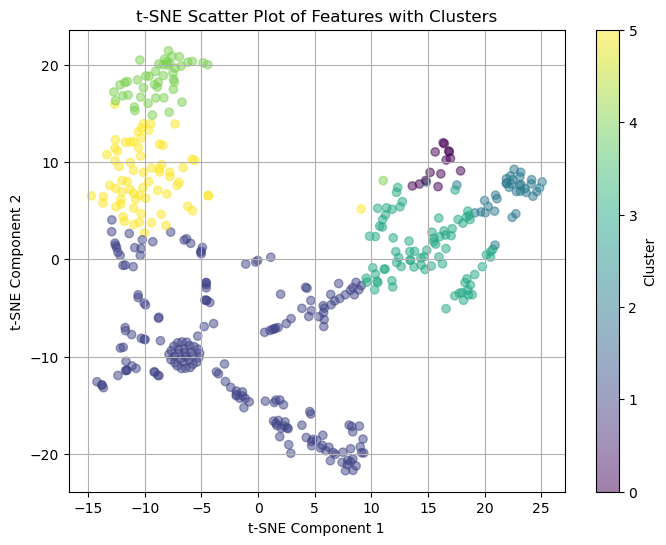

In [127]:
#features
columns = ['Milk', 'Fresh', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = new_df[columns]

#centroids
k = 6  # Number of clusters
centroids = X.sample(n=k, random_state=0)

# loop that assess the convergence
for _ in range(100):  # Maximum iterations

# clusters'data points
    clusters = []
    for index, row in X.iterrows():
        min_distance = float('inf')
        closest_centroid = None
        for centroid_index, centroid in centroids.iterrows():
            distance = ((row - centroid) ** 2).sum() ** 0.5
            if distance < min_distance:
                min_distance = distance
                closest_centroid = centroid_index
        clusters.append(closest_centroid)

    # centroids updating
    new_centroids = []
    for cluster in set(clusters):
        cluster_data = X.iloc[[i for i, c in enumerate(clusters) if c == cluster]]
        new_centroid = cluster_data.mean()
        new_centroids.append(new_centroid)
    new_centroids = pd.DataFrame(new_centroids)

    # Checking convergence
    if centroids.equals(new_centroids):
        break

    centroids = new_centroids

# Final clusters
y_km = clusters

# Applying t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Plot the scatter plot with all clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_km, cmap='viridis', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot of Features with Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

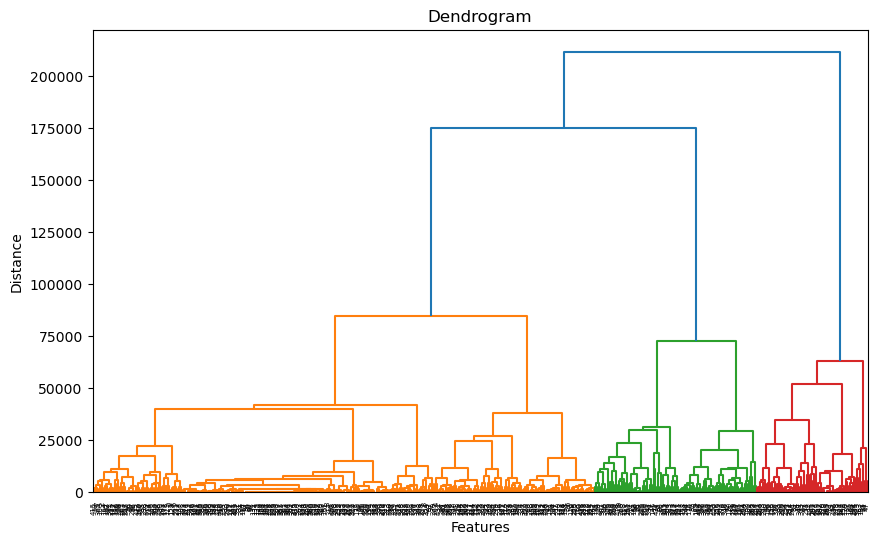

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#'Milk', 'Fresh', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = new_df[columns].values

# using 'ward' linkage to perform hierarchical clustering
linked = linkage(X, 'ward')  

# dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()


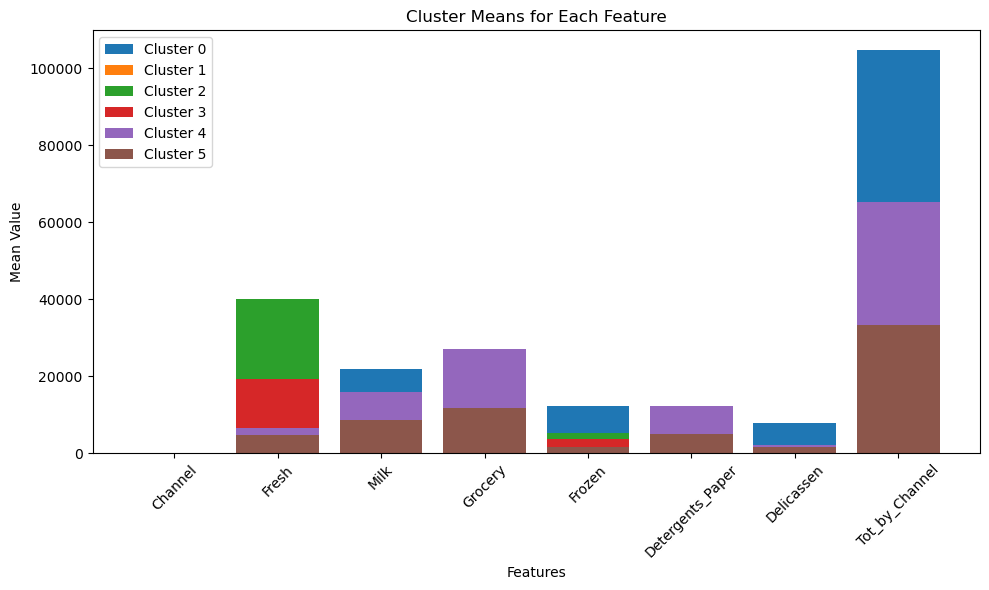

In [131]:
clustered_df = df.copy()
clustered_df['cluster'] = clusters  

# Grouping by cluster and calculate mean of each feature within each cluster
cluster_means = clustered_df.groupby('cluster').mean()

#cluster_means gives values of each feature within each cluster
plt.figure(figsize=(10, 6))

# plotting the mean values of features
for cluster_label, cluster_mean in cluster_means.iterrows():
    plt.bar(df.columns, cluster_mean, label=f'Cluster {cluster_label}')

plt.title('Cluster Means for Each Feature')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Dendogram shows us important insights into the tree of hierarchical clusters that are formed by default if we use 'ward' linkage. To better understand which feature produce which clusters and their relationship, we plotted it on a bar plot and it definetely gave us important insights. 
1. Features like Fresh, Milk, Grocery, and Frozen share the same clusters while Detergents_Paper and Delicassen, not as much
2. Tot_by_Channel has its own big cluster (it makes sense since it is not part of the original features and its just a total of othe features)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

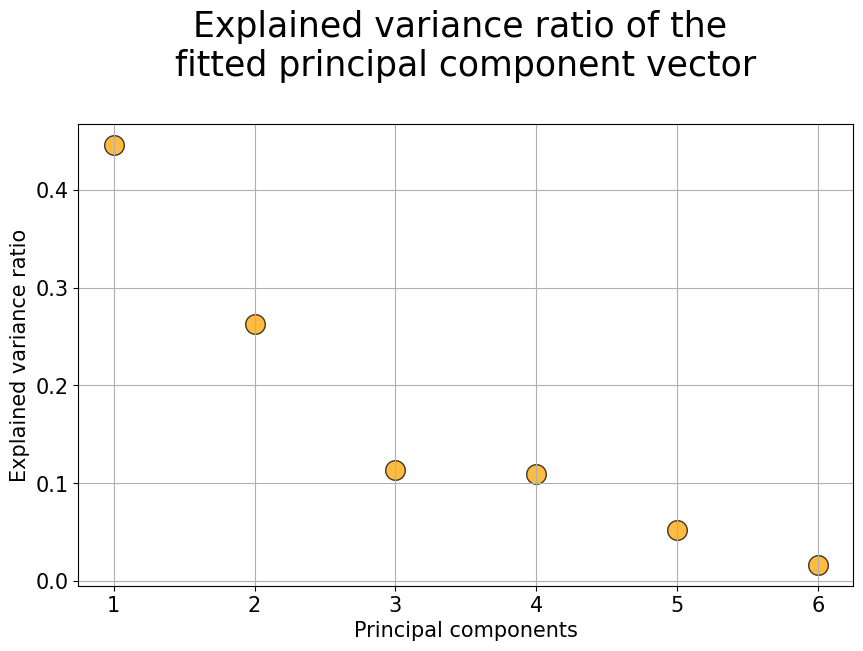

In [141]:
#Pre-processing using StandardScaler
scaler = StandardScaler()
X = new_df.drop(['Tot_by_Channel'],axis=1)
y = new_df['Tot_by_Channel']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=new_df.columns[:-1])

#PCA
pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx)

#Plotting
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

PCA's plot is crucial in determining the variance of every feature. Now we can see that the how much of each feature contribute to the dataset. Clearly, the first 2 features make a good percentage while the last two are less significant. 

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

These are the insights from the model and EDA explorations: 

1. Both K-Means clustering and Hierarchical clustering interestingly shows us how the clusters are formed in our dataset. However, Hierarchical clustring clarifies it even further by helping us attribute which clusters are related to which features in our data. From that, we can see that there are some clusters that share the same tree node which signifies strong relationship among them. Features like Fresh, Milk, Grocery, and Frozen share the same nodes and it shows that they have strong relationship.
2. PCA shows another crucial information: how much of the feature contribute to the dataset. From that we can deduce that features like Fresh, Milk, and Grocery definetely makes a good percentage of our dataset while the remaining three make less. It is easily visualized in the dendrogram above.

Conclustion: Products in the Fresh, Milk, and Grocery categories are popular among the customers and they make a big number of the wholesale distributor's sales. 